In [77]:
import matplotlib
import matplotlib.pyplot as plt
#from labellines import labelLine, labelLines
import seaborn as sns
import os
import pandas as pd
import glob
import numpy as np

In [78]:
path = '/uscms/home/jieun201/nobackup/YOURWORKINGAREA/june23_ds8_labelsOnly'
csv_files = glob.glob(path + "/*.csv")
df_labels = (pd.read_csv(file) for file in csv_files)
big_df_labels   = pd.concat(df_labels, ignore_index=True)

In [79]:
path = '/uscms/home/jieun201/nobackup/YOURWORKINGAREA/june23_ds8_negativeLabelsOnly'
csv_files2 = glob.glob(path + "/*.csv")
df_labels2 = (pd.read_csv(file) for file in csv_files2)
big_df_labels2   = pd.concat(df_labels2, ignore_index=True)

In [80]:
mergePosNeg = pd.concat([big_df_labels, big_df_labels2])

Text(0, 0.5, 'Tracks')

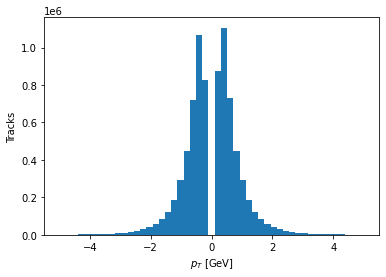

In [81]:
# True pT distribution (physical with sign)
plt.hist(mergePosNeg['pt'],bins=np.linspace(-5,5,50),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')

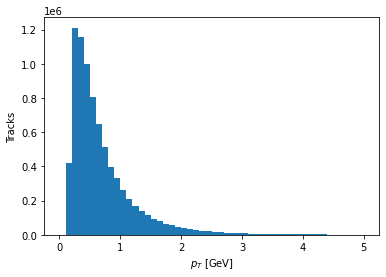

In [82]:
# True pT distribution (physical no sign)
h_physical = plt.hist(abs(mergePosNeg['pt']),bins=np.linspace(0,5,51),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')

# weight per pT bin
w_physical = h_physical[0]/np.sum(h_physical[0])

In [119]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TestSetTruePT.csv')
df2 = pd.read_csv('predictionsFiles.csv')
df3 = pd.read_csv('true.csv')
df2.columns.values[0] = "predict"
df3.columns.values[0] = "true"
df2['predict'] = df2['predict'].astype(int)
concatenate = pd.concat([df1,df2, df3], axis=1)
concatenate.head()

,pt,predict,true
0,-2.627300,0,0
1,0.195180,2,2
2,1.338710,2,0
3,0.180981,2,2
4,0.457629,0,0


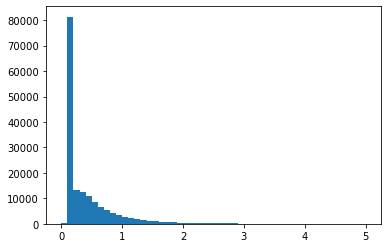

In [84]:
# Unphysical pT distribution (no sign)
h_unphysical = plt.hist(abs(concatenate['pt']),bins=np.linspace(0,5,51),histtype='stepfilled');
w_unphysical = h_unphysical[0]/np.sum(h_unphysical[0])

In [85]:
# weight each bin up by physical weight, down by unphysical weight
r = w_physical/w_unphysical
r

array([0.09220273, 0.10520659, 1.86635974, 1.87644152, 1.8819957 ,
       1.91067204, 1.97581635, 1.89253467, 1.92261177, 1.91121519,
       1.87466787, 1.8842394 , 1.91810034, 1.79382944, 1.91599299,
       1.8178862 , 1.78914007, 1.88271918, 1.92228433, 1.90341326,
       2.14688638, 1.9437286 , 1.9955825 , 2.02025703, 2.04058718,
       1.90479868, 1.89203297, 2.04087254, 1.5830703 , 2.52523492,
       1.93053214, 1.6749192 , 2.4488752 , 1.6518003 , 2.11012533,
       1.58976917, 2.04652731, 2.11429708, 2.27066745, 1.69887097,
       1.99169543, 1.99462297, 2.82431519, 2.24580372, 1.45971479,
       1.78399436, 1.99583447, 2.32554695, 1.67443143, 1.86399509])

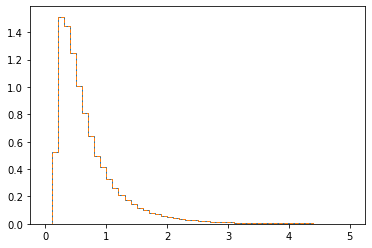

In [116]:
# Check that I did this right...
plt.hist(np.linspace(0,5,50),bins=np.linspace(0,5,51),weights=h_unphysical[0]*r,histtype='step',density=True);
plt.hist(abs(mergePosNeg['pt']),bins=np.linspace(0,5,51),histtype='step',linestyle='--',density=True);

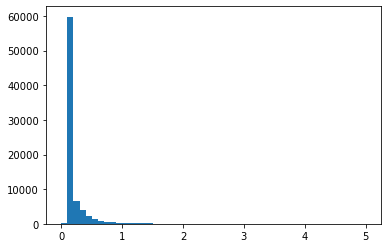

In [66]:
# Unphysical pT distribution of rejected clusters only
h_reject = plt.hist(abs(concatenate[concatenate['predict']>0]['pt']),bins=np.linspace(0,5,51))

In [117]:
np.sum(h_reject[0]*r)/np.sum(h_unphysical[0]*r)

0.24462735155980214

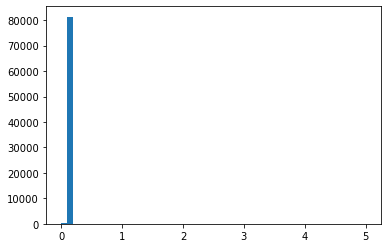

In [120]:
# Unphysical pT distribution of true low pT clusters
h_lowpt = plt.hist(abs(concatenate[concatenate['true']>0]['pt']),bins=np.linspace(0,5,51))

In [121]:
np.sum(h_lowpt[0]*r)/np.sum(h_unphysical[0]*r)

0.052589897929206736

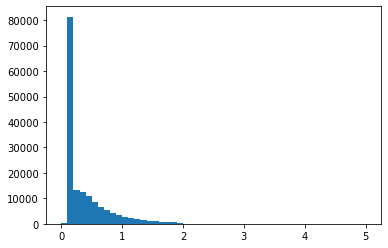

In [122]:
# Unphysical pT distribution of true low pT clusters
h_lowpt = plt.hist(abs(concatenate[abs(concatenate['pt'])<2]['pt']),bins=np.linspace(0,5,51))

In [123]:
np.sum(h_lowpt[0]*r)/np.sum(h_unphysical[0]*r)

0.9657210898385493

In [127]:
len(mergePosNeg[abs(mergePosNeg['pt'])<2])/len(mergePosNeg['pt'])

0.9657210898385494